In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from datetime import datetime
import warnings
import sys
import os
import scipy.cluster.hierarchy as sch
from sklearn import metrics
import pandas_profiling as pp
import sweetviz as sv
import scipy.stats as stat
import pylab 

In [2]:
v00 = pd.read_csv("marketing_campaign1.csv")
v00

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Basic Data Cleaning / Data preparation 

In [3]:
v00.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
## Removing null values from Income and replacing with Mean 

IncMean = v00['Income'].mean()
IncMean
v00['Income'].fillna(IncMean, inplace = True)

In [5]:
#checking duplicated data
v00.duplicated().sum()

0

In [6]:
# Data duplicating so as can be used at final stage for clustering check 
vb = pd.DataFrame(v00)

# Feature Engineering 
    - Feature Modification 
    - Feture Deletion 
    - Feature Scaling 
    - Outlier detection and removal

In [7]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
v00['Dt_Customer'].info

<bound method Series.info of 0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object>

In [9]:
v00['Dt_Customer'] = pd.to_datetime(v00['Dt_Customer'])
v00['Customer_Retention'] = 12.0 * (2015 - v00.Dt_Customer.dt.year ) + (1 - v00.Dt_Customer.dt.month)

C:\Users\aniru\AppData\Local\Temp\ipykernel_25364\2913520824.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  v00['Dt_Customer'] = pd.to_datetime(v00['Dt_Customer'])


In [10]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention'],
      dtype='object')

In [11]:
# Renaming columns
v00 = v00.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [12]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention'],
      dtype='object')

In [13]:
# Converting feature in form of Customer Age 
#v00['Age'] = datetime.now().year - v00['Year_Birth']  # Client Age
v00['Age'] = 2015 - v00['Year_Birth']  # Client Age

In [14]:
v00['Education'] = v00['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
v00['Education'] = v00['Education'].replace(['Basic'], 'UG')

In [15]:
v00['Kids'] = v00['Kidhome'] + v00['Teenhome']

In [16]:
v00['Marital_Status'] = v00['Marital_Status'].replace(['Married', 'Together'],'Relationship')
v00['Marital_Status'] = v00['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [17]:
v00['Total_Acc_offer'] = (v00['AcceptedCmp1']+v00['AcceptedCmp2']+v00['AcceptedCmp3']+v00['AcceptedCmp4'])

In [18]:
v00['Total_Spend'] = (v00['Wines']+v00['Fruits']+v00['Meat']+v00['Fish']+v00['Sweets']+v00['Gold'])

In [19]:
v00['Total_Purchases'] = (v00['NumWebPurchases']+v00['NumCatalogPurchases']+v00['NumStorePurchases'])

In [20]:
# Converting lable to numerical data 
# Lable Encoding 

In [21]:
v00["Education"] = v00["Education"].replace({"PG": 1, "UG": 0})

In [22]:
v00['Marital_Status'] = v00['Marital_Status'].replace({'Single': 1, 'Relationship': 2})

In [23]:
v00

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_Retention,Age,Kids,Total_Acc_offer,Total_Spend,Total_Purchases
0,5524,1957,1,1,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,33.0,58,0,0,1617,22
1,2174,1954,1,1,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,5.0,61,2,0,27,4
2,4141,1965,1,2,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,17.0,50,0,0,776,20
3,6182,1984,1,2,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,3.0,31,1,0,53,6
4,5324,1981,1,2,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,12.0,34,1,0,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,19.0,48,1,0,1341,16
2236,4001,1946,1,2,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,3.0,69,3,1,444,15
2237,7270,1981,1,1,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,12.0,34,0,1,1241,18
2238,8235,1956,1,2,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,12.0,59,1,0,843,21


In [24]:
v00['Family_size'] = (v00['Marital_Status']+v00['Kids'])

In [25]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention', 'Age', 'Kids', 'Total_Acc_offer', 'Total_Spend',
       'Total_Purchases', 'Family_size'],
      dtype='object')

In [26]:
# Data duplicating so as can be used at final stage for clustering check 
vb1 = pd.DataFrame(v00)

In [27]:
vb1.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,Z_CostContact,Z_Revenue,Response,Customer_Retention,Age,Kids,Total_Acc_offer,Total_Spend,Total_Purchases,Family_size
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.975893,1.644643,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,...,3.0,11.0,0.149107,18.142411,46.194196,0.950446,0.225000,605.798214,12.537054,2.595089
std,3246.662198,11.984069,0.153416,0.478728,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,...,0.0,0.0,0.356274,7.659851,11.984069,0.751803,0.524777,602.249288,7.205741,0.906959
min,0.000000,1893.000000,0.000000,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,1.000000,19.000000,0.000000,0.000000,5.000000,0.000000,1.000000
25%,2828.250000,1959.000000,1.000000,1.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,...,3.0,11.0,0.000000,13.000000,38.000000,0.000000,0.000000,68.750000,6.000000,2.000000
50%,5458.500000,1970.000000,1.000000,2.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,...,3.0,11.0,0.000000,18.000000,45.000000,1.000000,0.000000,396.000000,12.000000,3.000000
75%,8427.750000,1977.000000,1.000000,2.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,...,3.0,11.0,0.000000,24.000000,56.000000,1.000000,0.000000,1045.500000,18.000000,3.000000
max,11191.000000,1996.000000,1.000000,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,...,3.0,11.0,1.000000,36.000000,122.000000,3.000000,3.000000,2525.000000,32.000000,5.000000


In [28]:
# Feature Elimination based on co-relation and visual inspection 

In [29]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention', 'Age', 'Kids', 'Total_Acc_offer', 'Total_Spend',
       'Total_Purchases', 'Family_size'],
      dtype='object')

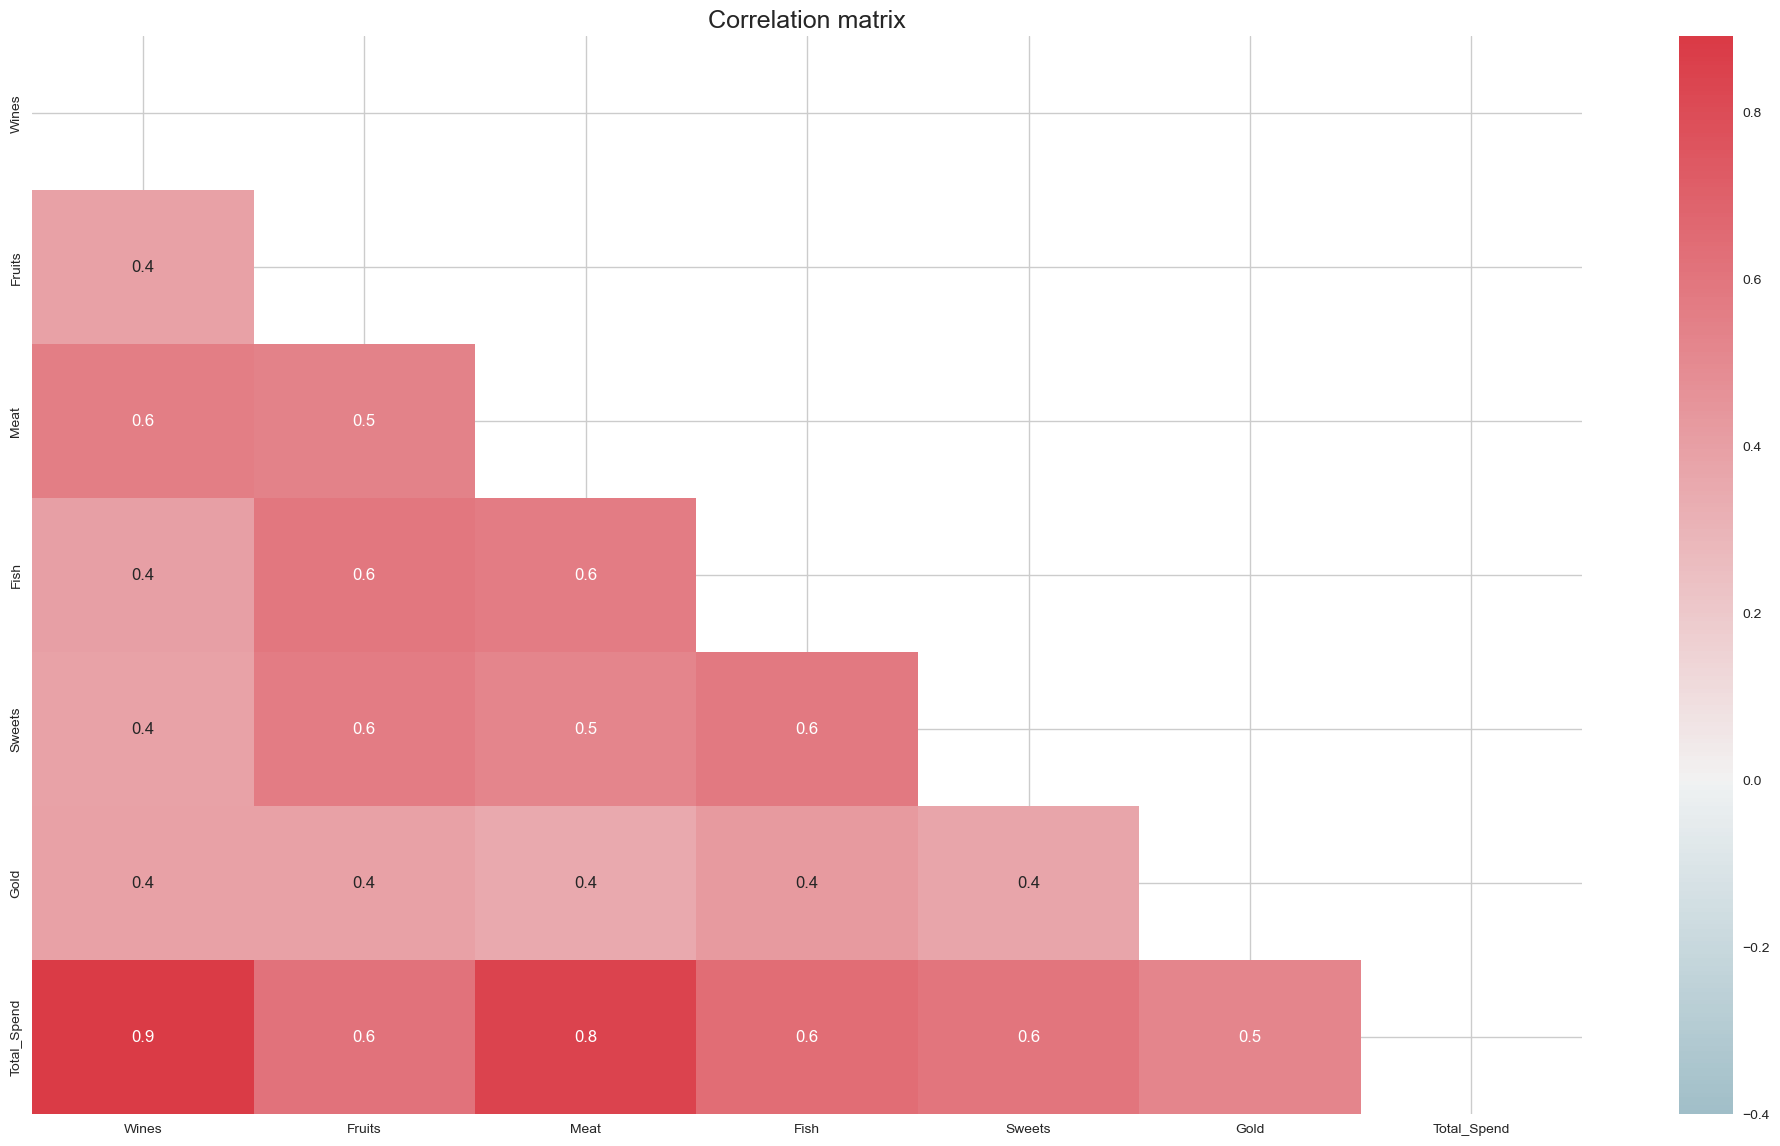

In [30]:
to_corr = ['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold','Total_Spend']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(v00[to_corr].corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(v00[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

In [31]:
# df = pd.DataFrame(data, columns=['Name', 'Age'])
products = pd.DataFrame(v00, columns = ['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold','Total_Spend'])
products

,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Spend
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,1341
2236,406,0,30,0,0,8,444
2237,908,48,217,32,12,24,1241
2238,428,30,214,80,30,61,843


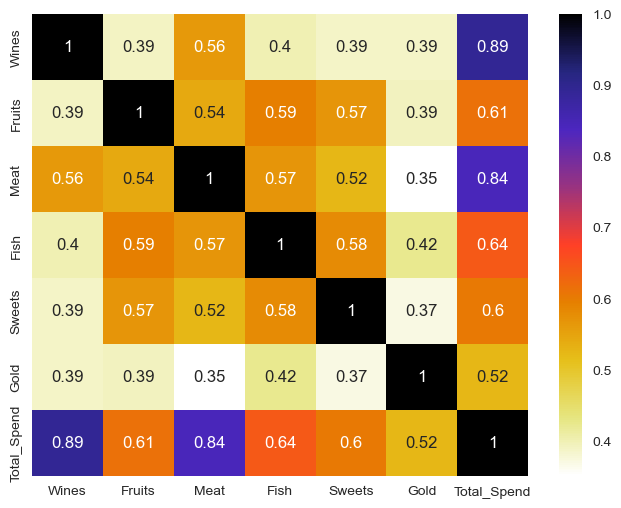

In [32]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = products.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [33]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(products,0.8)
len(set(corr_features))
corr_features

{'Total_Spend'}

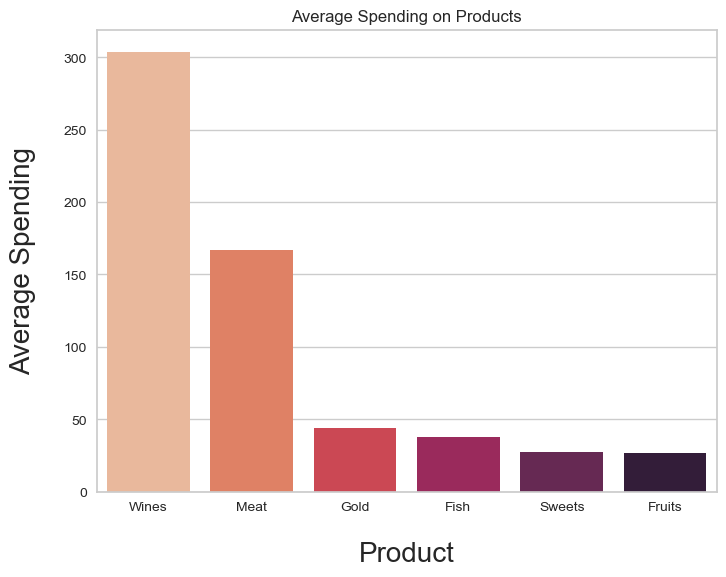

In [35]:
products = products[['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(8,6))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending', palette='rocket_r');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);
plt.show()

In [36]:
# Feature Elimination : Product 
# Above study shows Total spending have high co relation with meat and wine 
# Wine and meat have high share in total spending 

# So we can drop all product column and have Total Spending as representation of product  

In [37]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention', 'Age', 'Kids', 'Total_Acc_offer', 'Total_Spend',
       'Total_Purchases', 'Family_size'],
      dtype='object')

In [38]:
childrenspending = v00.groupby('Kids')['Total_Spend'].mean().sort_values(ascending=False)
childrenspending

Kids
0    1106.029781
1     472.733156
3     274.603774
2     245.947743
Name: Total_Spend, dtype: float64

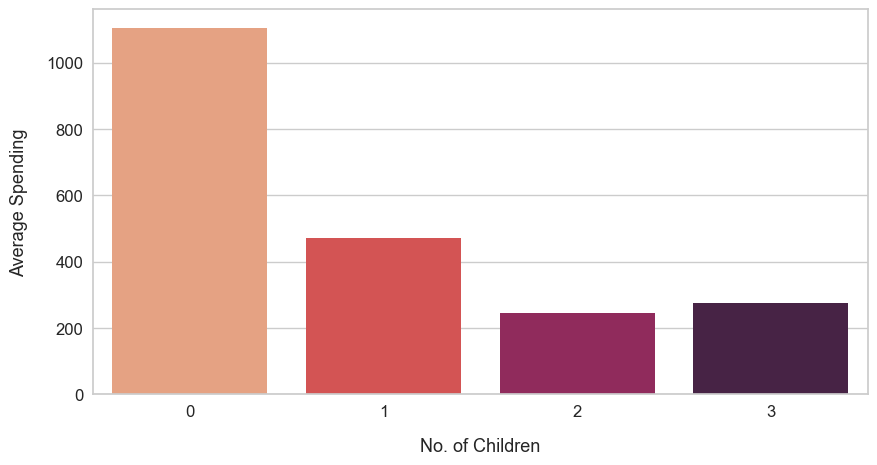

In [39]:
childrenspending = v00.groupby('Kids')['Total_Spend'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('No. of Children', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);
plt.show()

In [40]:
familyspending = v00.groupby('Family_size')['Total_Spend'].mean().sort_values(ascending=False)
familyspending

Family_size
1    1105.401575
2     785.039267
3     440.573678
5     308.531250
4     248.847176
Name: Total_Spend, dtype: float64

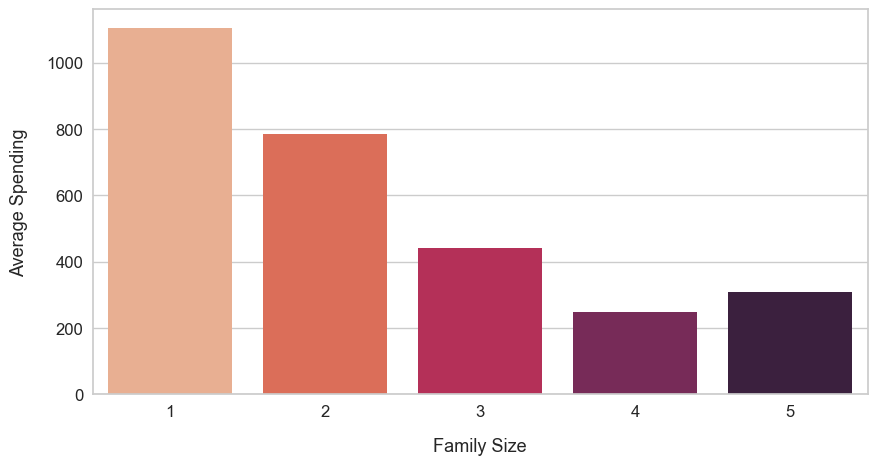

In [41]:
childrenspending = v00.groupby('Family_size')['Total_Spend'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(10,5))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Family Size', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);
plt.show()

In [42]:
# Based on above data we can consider only Kids
# kids = (Total NUmber of kids at home) since it have less features as compare to family size 

In [43]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention', 'Age', 'Kids', 'Total_Acc_offer', 'Total_Spend',
       'Total_Purchases', 'Family_size'],
      dtype='object')

In [44]:
# df = pd.DataFrame(data, columns=['Name', 'Age'])
promotions = pd.DataFrame(v00, columns = ['Income','NumDealsPurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Total_Acc_offer'])
promotions

,Income,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Total_Acc_offer
0,58138.0,3,0,0,0,0,0,0
1,46344.0,2,0,0,0,0,0,0
2,71613.0,1,0,0,0,0,0,0
3,26646.0,2,0,0,0,0,0,0
4,58293.0,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,61223.0,2,0,0,0,0,0,0
2236,64014.0,7,0,0,0,1,0,1
2237,56981.0,1,0,1,0,0,0,1
2238,69245.0,2,0,0,0,0,0,0


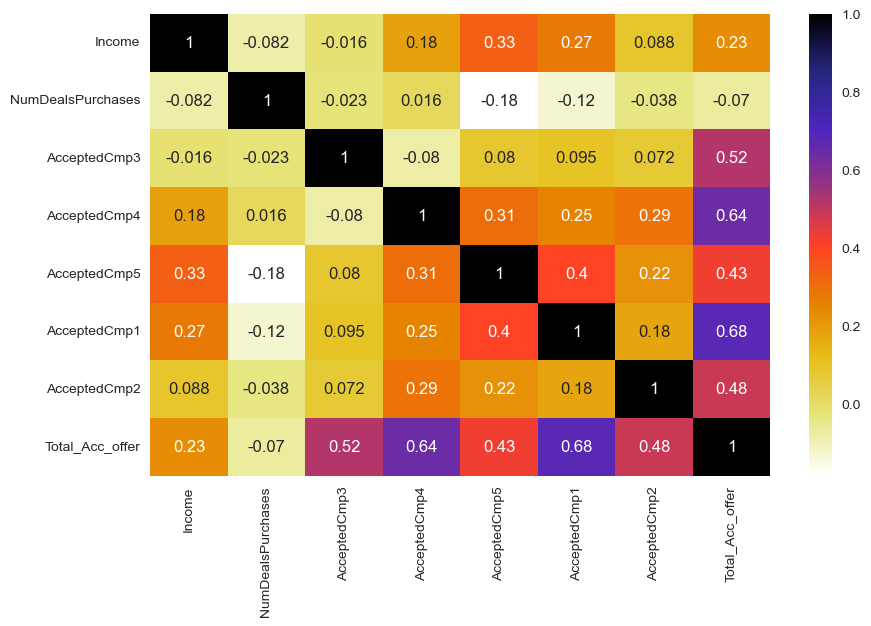

In [45]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,6))
cor = promotions.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [46]:
corr_features = correlation(promotions,0.7)
len(set(corr_features))
corr_features

set()

In [47]:
promotions.describe()

,Income,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Total_Acc_offer
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,2.325000,0.072768,0.074554,0.072768,0.064286,0.013393,0.225000
std,25037.797168,1.932238,0.259813,0.262728,0.259813,0.245316,0.114976,0.524777
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51741.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68289.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,666666.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [48]:
childrenspending = v00.groupby('NumDealsPurchases')['Total_Spend'].mean().sort_values(ascending=False)
childrenspending

NumDealsPurchases
0     1234.760870
11    1138.600000
13     952.000000
15     904.571429
10     795.400000
1      720.335052
8      698.071429
12     676.000000
7      638.300000
9      635.125000
6      592.639344
5      581.840426
4      498.507937
3      474.363636
2      429.714286
Name: Total_Spend, dtype: float64

In [49]:
childrenspending = v00.groupby('Total_Acc_offer')['Total_Spend'].mean().sort_values(ascending=False)
childrenspending

Total_Acc_offer
2    1490.918919
3    1482.615385
1     891.299685
0     514.620915
Name: Total_Spend, dtype: float64

In [50]:
# Since data is not showing any promishing co relation, not considered for clustering 

In [51]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention', 'Age', 'Kids', 'Total_Acc_offer', 'Total_Spend',
       'Total_Purchases', 'Family_size'],
      dtype='object')

In [52]:
places = pd.DataFrame(v00, columns = ['Income','NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Total_Purchases'])
places

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
0,58138.0,8,10,4,22
1,46344.0,1,1,2,4
2,71613.0,8,2,10,20
3,26646.0,2,0,4,6
4,58293.0,5,3,6,14
...,...,...,...,...,...
2235,61223.0,9,3,4,16
2236,64014.0,8,2,5,15
2237,56981.0,2,3,13,18
2238,69245.0,6,5,10,21


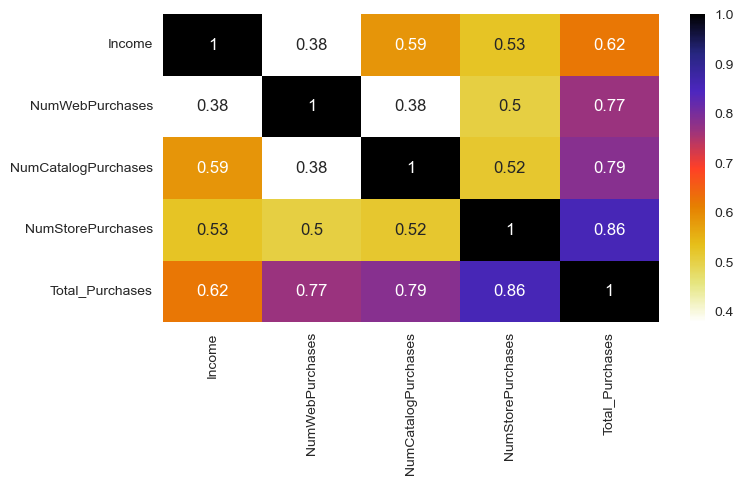

In [53]:
#Using Pearson Correlation
plt.figure(figsize=(8,4))
cor = places.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [54]:
corr_features = correlation(places,0.6)
len(set(corr_features))
corr_features

{'Total_Purchases'}

In [55]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention', 'Age', 'Kids', 'Total_Acc_offer', 'Total_Spend',
       'Total_Purchases', 'Family_size'],
      dtype='object')

In [56]:
# With above data we can consider Total Purchase feature for further clustering analysis 

In [57]:
v00.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Retention', 'Age', 'Kids', 'Total_Acc_offer', 'Total_Spend',
       'Total_Purchases', 'Family_size'],
      dtype='object')

In [58]:
v00['Education'].describe()

count    2240.000000
mean        0.975893
std         0.153416
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Education, dtype: float64

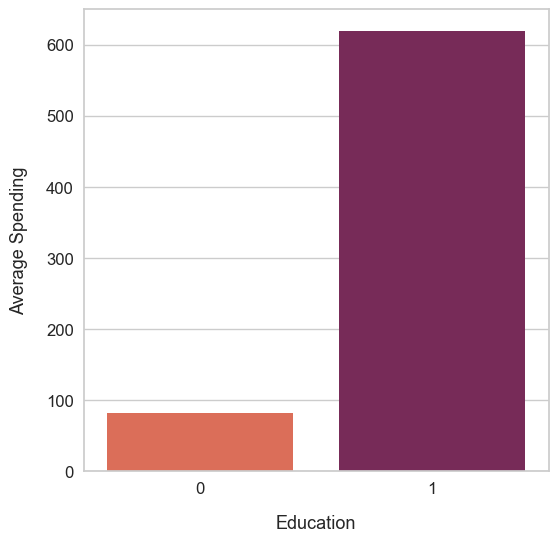

In [59]:
childrenspending = v00.groupby('Education')['Total_Spend'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['Education', 'Average Spending'])

plt.figure(figsize=(6,6))

sns.barplot(data=childrenspending_df,  x="Education", y="Average Spending", palette='rocket_r');
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.xlabel('Education', fontsize=13, labelpad=13)
plt.ylabel('Average Spending', fontsize=13, labelpad=13);
plt.show()

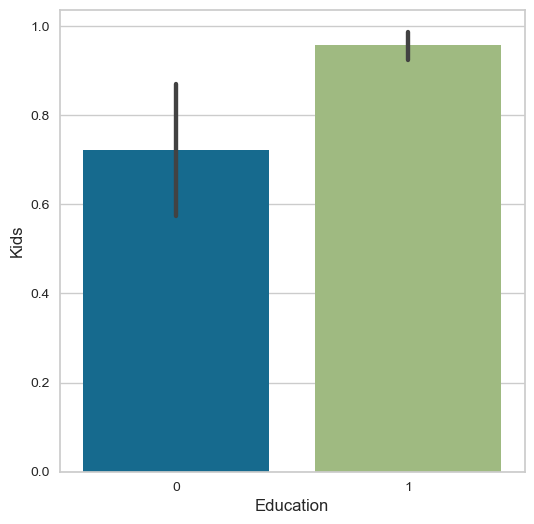

In [60]:
plt.figure(figsize=(6,6))
ax=sns.barplot(data=v00, x='Education', y='Kids')
plt.show()

In [61]:
# Above data shows kids and education is having direct relationship so we can skip education 

In [62]:
v02 = pd.DataFrame (v00)

In [63]:
to_drop = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Total_Acc_offer',
       'Total_Purchases', 'Family_size']
v01 = v02.drop(to_drop, axis=1)

In [64]:
v01.columns

Index(['Income', 'Customer_Retention', 'Age', 'Kids', 'Total_Spend'], dtype='object')

<Axes: >

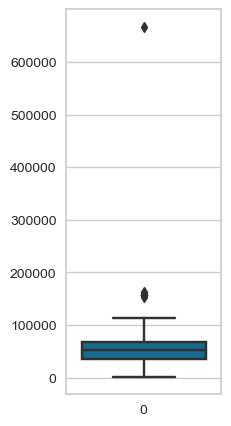

In [65]:
plt.figure(figsize=(2,5))
sns.boxplot(v01['Income'])

In [66]:
# Min Max Cal  
IQR = v01.Income.quantile(0.75)-v01.Income.quantile(0.25)
lowBridge = v01['Income'].quantile(0.25)-(IQR*1.5)
UprBridge = v01['Income'].quantile(0.75)+(IQR*1.5)
print ('IQR  =',IQR)
print ('lowBridge  =',lowBridge)
print ('UprBridge  =',UprBridge)

IQR  = 32751.0
lowBridge  = -13587.75
UprBridge  = 117416.25


In [67]:
v01.loc[v01['Income']>=117416,'Income']= 117416

<Axes: >

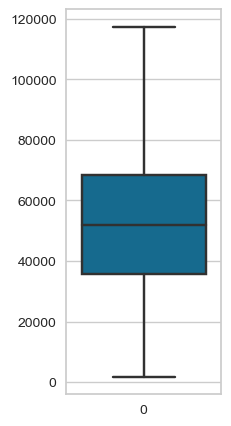

In [68]:
plt.figure(figsize=(2,5))
sns.boxplot(v01['Income'])

In [69]:
# Min Max Cal  
IQR = v01.Total_Spend.quantile(0.75)-v01.Total_Spend.quantile(0.25)
lowBridge = v01['Total_Spend'].quantile(0.25)-(IQR*1.5)
UprBridge = v01['Total_Spend'].quantile(0.75)+(IQR*1.5)
print ('IQR  =',IQR)
print ('lowBridge  =',lowBridge)
print ('UprBridge  =',UprBridge)

IQR  = 976.75
lowBridge  = -1396.375
UprBridge  = 2510.625


In [70]:
v01.loc[v01['Total_Spend']>=2510.625,'Total_Spend']= 2510.625

In [71]:
# Min Max Cal  
IQR = v01.Age.quantile(0.75)-v01.Age.quantile(0.25)
lowBridge = v01['Age'].quantile(0.25)-(IQR*1.5)
UprBridge = v01['Age'].quantile(0.75)+(IQR*1.5)
print ('IQR  =',IQR)
print ('lowBridge  =',lowBridge)
print ('UprBridge  =',UprBridge)

IQR  = 18.0
lowBridge  = 11.0
UprBridge  = 83.0


In [72]:
v01.loc[v01['Age']>=91.0,'Age']= 91.0

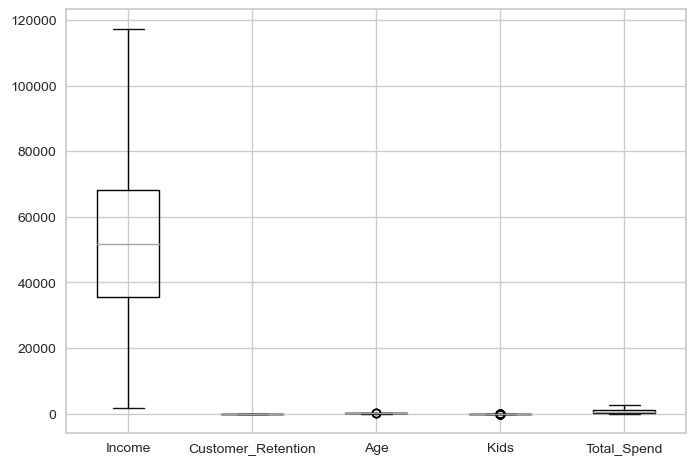

In [73]:
v01.boxplot()
plt.show()

In [74]:
v01.describe()

,Income,Customer_Retention,Age,Kids,Total_Spend
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51875.149568,18.142411,46.158482,0.950446,605.779408
std,20936.077142,7.659851,11.808861,0.751803,602.189559
min,1730.000000,1.000000,19.000000,0.000000,5.000000
25%,35538.750000,13.000000,38.000000,0.000000,68.750000
50%,51741.500000,18.000000,45.000000,1.000000,396.000000
75%,68289.750000,24.000000,56.000000,1.000000,1045.500000
max,117416.000000,36.000000,91.000000,3.000000,2510.625000


In [75]:
v01.dtypes

Income                float64
Customer_Retention    float64
Age                     int64
Kids                    int64
Total_Spend           float64
dtype: object

In [76]:
v01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              2240 non-null   float64
 1   Customer_Retention  2240 non-null   float64
 2   Age                 2240 non-null   int64  
 3   Kids                2240 non-null   int64  
 4   Total_Spend         2240 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 87.6 KB


# Cluster Identification  

In [77]:
def scaling_func_mms(df: pd.DataFrame) -> None:
    mms = MinMaxScaler()
    return pd.DataFrame(data=mms.fit_transform(df), columns=df.columns)

In [78]:
v01_mms = scaling_func_mms(v01)
v01_mms

,Income,Customer_Retention,Age,Kids,Total_Spend
0,0.487596,0.914286,0.541667,0.000000,0.643352
1,0.385647,0.114286,0.583333,0.666667,0.008780
2,0.604075,0.457143,0.430556,0.000000,0.307708
3,0.215376,0.057143,0.166667,0.333333,0.019157
4,0.488936,0.314286,0.208333,0.333333,0.166426
...,...,...,...,...,...
2235,0.514263,0.514286,0.402778,0.333333,0.533200
2236,0.538388,0.057143,0.694444,1.000000,0.175206
2237,0.477595,0.314286,0.208333,0.000000,0.493290
2238,0.583606,0.314286,0.555556,0.333333,0.334447


In [79]:
def scaling_func_ss(df: pd.DataFrame) -> None:
    ss = StandardScaler()
    return pd.DataFrame(data=ss.fit_transform(df), columns=df.columns)

In [80]:
v01_ss = scaling_func_ss(v01)
v01_ss

,Income,Customer_Retention,Age,Kids,Total_Spend
0,0.299208,1.940104,1.002989,-1.264505,1.679615
1,-0.264251,-1.716136,1.257093,1.396361,-0.961340
2,0.942978,-0.149176,0.325381,-1.264505,0.282733
3,-1.205325,-1.977296,-1.283940,0.065928,-0.918154
4,0.306613,-0.802076,-1.029837,0.065928,-0.305253
...,...,...,...,...,...
2235,0.446595,0.111984,0.155979,0.065928,1.221185
2236,0.579935,-1.977296,1.934701,2.726794,-0.268712
2237,0.243933,-0.802076,-1.029837,-1.264505,1.055087
2238,0.829846,-0.802076,1.087690,0.065928,0.394018


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

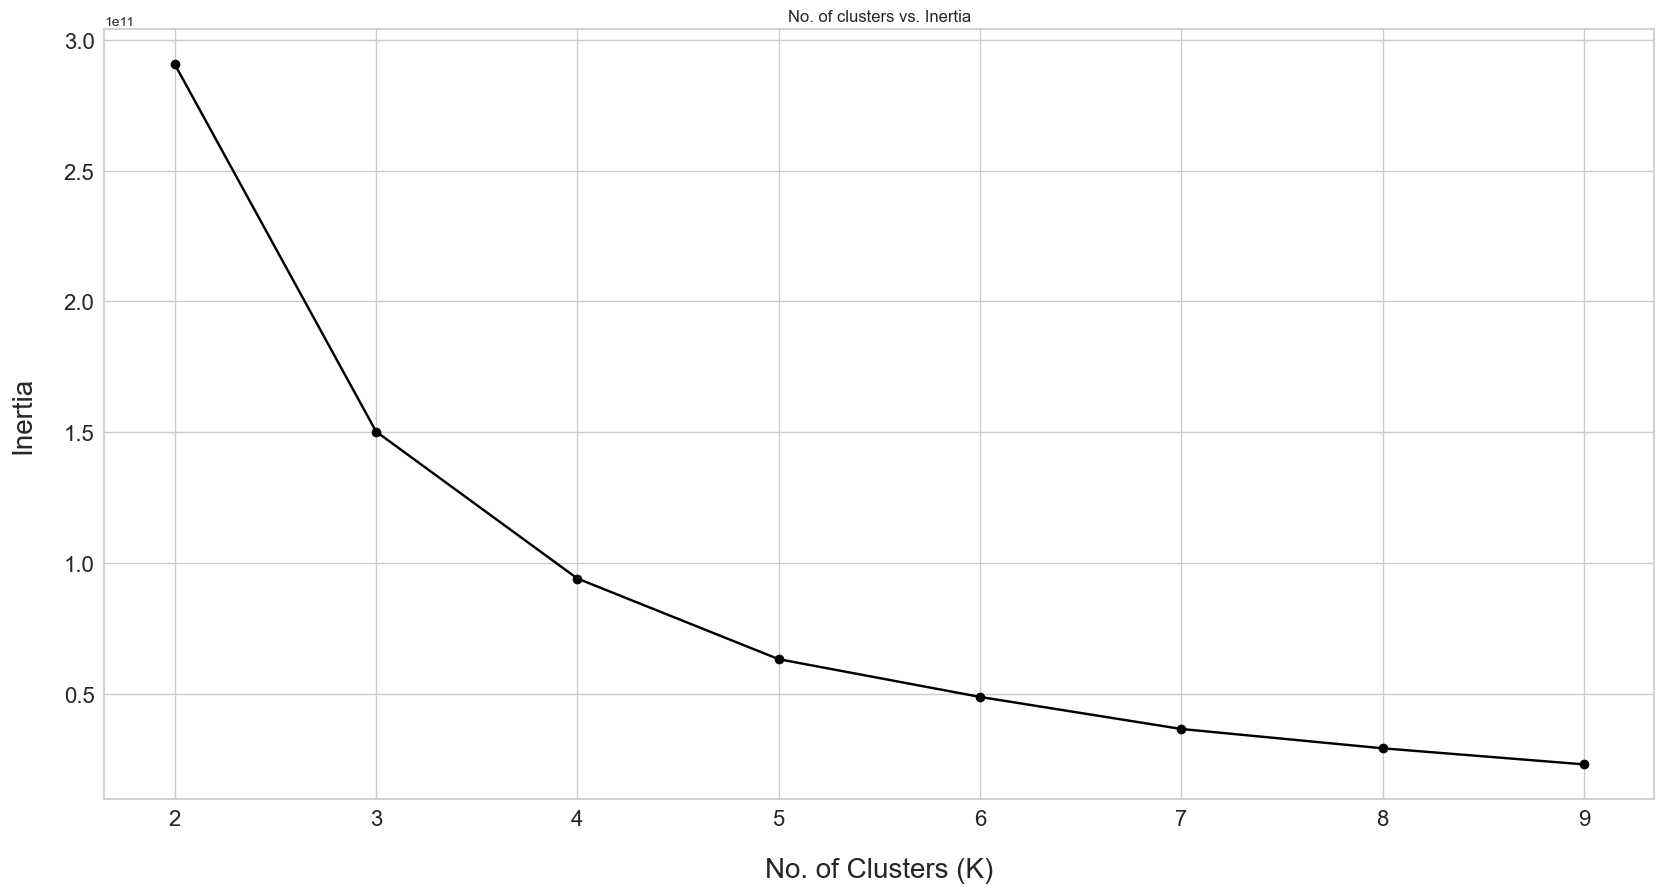

In [81]:
from sklearn.cluster import KMeans

options = range(2,10)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(v01)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', color = 'black')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);
plt.show()

In [82]:
score=[]
K=range(1,10)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(v01)
    score.append(kmeans.inertia_)

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

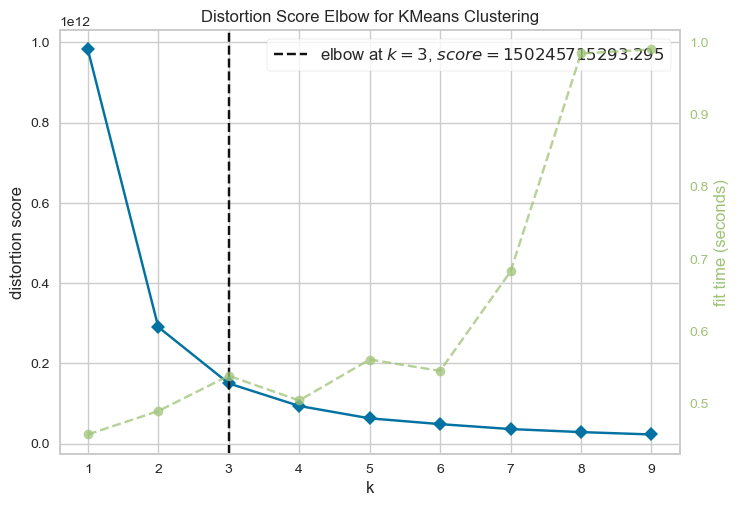

In [83]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(1,10))   
visu.fit(v01)
visu.poof();
plt.show()

In [84]:
# defining the algorithm 
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(v01) 
print ('kmeans_inertia    ' ,kmeans.inertia_)
# generating labels or cluster ID
label = kmeans.fit_predict(v01)

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


kmeans_inertia     94046724535.7918


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [139]:
ClusterData = pd.DataFrame(label,columns = ['Cluster_ID'])
print ('Number of cluster observed  ',ClusterData.value_counts())

Number of cluster observed   Cluster_ID
2             658
1             640
0             498
3             444
dtype: int64


In [140]:
v01r = pd.concat([v01,ClusterData], axis=1)
v01r

,Income,Customer_Retention,Age,Kids,Total_Spend,Cluster_ID
0,58138.0,33.0,58,0,1617.0,2
1,46344.0,5.0,61,2,27.0,1
2,71613.0,17.0,50,0,776.0,0
3,26646.0,3.0,31,1,53.0,3
4,58293.0,12.0,34,1,422.0,2
...,...,...,...,...,...,...
2235,61223.0,19.0,48,1,1341.0,2
2236,64014.0,3.0,69,3,444.0,2
2237,56981.0,12.0,34,0,1241.0,2
2238,69245.0,12.0,59,1,843.0,2


In [141]:
v01r.groupby('Cluster_ID').agg(['mean'])

,Income,Customer_Retention,Age,Kids,Total_Spend
,mean,mean,mean,mean,mean
Cluster_ID,,,,,
0,80161.026104,17.598394,47.279116,0.343373,1379.339106
1,41166.070312,17.798437,46.060938,1.328125,207.723437
2,60329.463575,18.559271,49.316109,1.016717,766.832827
3,23056.468468,18.630631,40.362613,0.988739,73.234234


# Cluster Identification

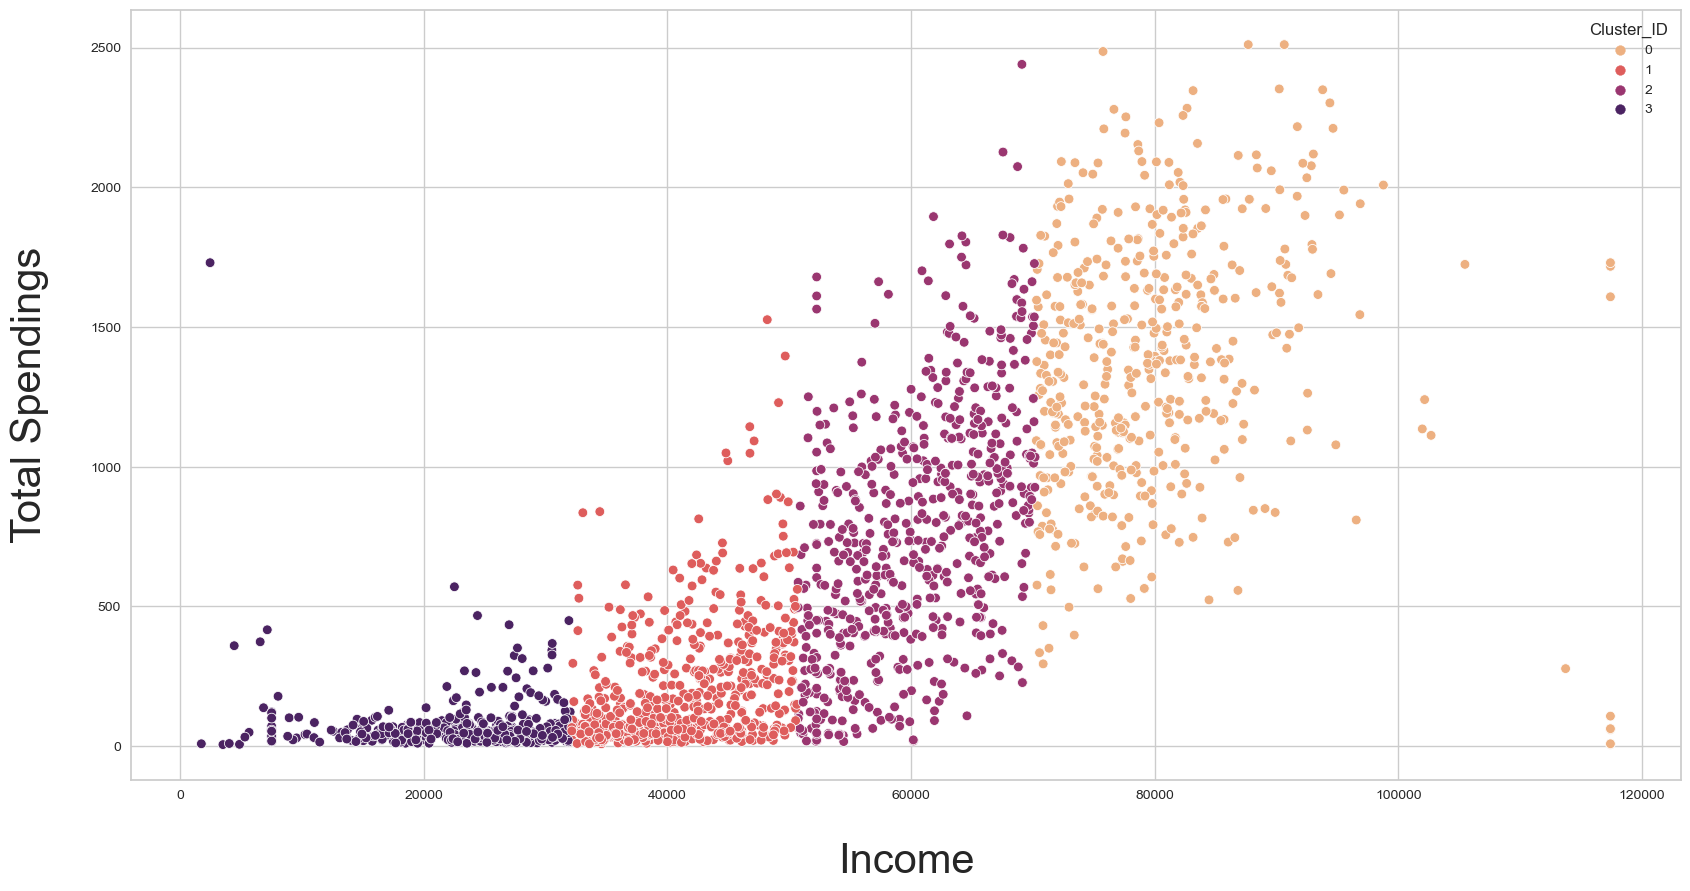

In [142]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=v01r, x='Income', y='Total_Spend', hue='Cluster_ID', palette='flare');
plt.xlabel('Income', fontsize=30, labelpad=30)
plt.ylabel('Total Spendings', fontsize=30, labelpad=30);
plt.show()

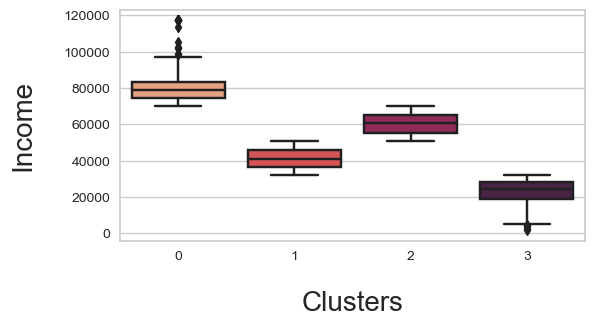

In [143]:
#Income
plt.figure(figsize=(6,3))

sns.boxplot(data=v01r, x='Cluster_ID', y = 'Income',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);
plt.show()

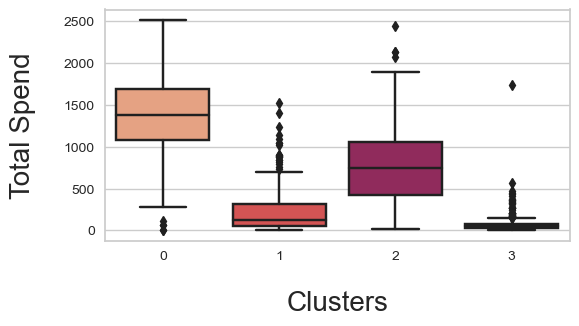

In [144]:
#Income
plt.figure(figsize=(6,3))

sns.boxplot(data=v01r, x='Cluster_ID', y = 'Total_Spend',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Total Spend', fontsize=20, labelpad=20);
plt.show()

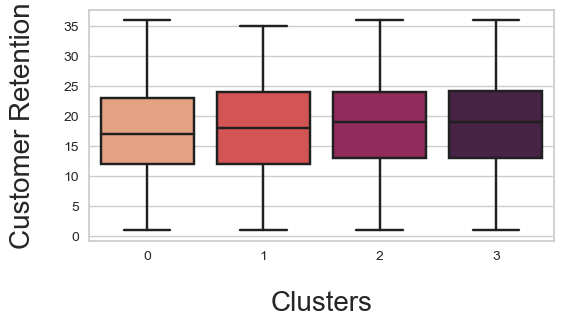

In [122]:
#Income
plt.figure(figsize=(6,3))

sns.boxplot(data=v01r, x='Cluster_ID', y = 'Customer_Retention',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Customer Retention', fontsize=20, labelpad=20);
plt.show()

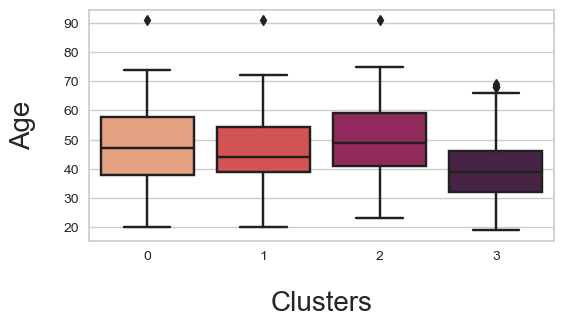

In [123]:
#Income
plt.figure(figsize=(6,3))

sns.boxplot(data=v01r, x='Cluster_ID', y = 'Age',palette='rocket_r');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20);
plt.show()

# Data Exploration: Clusters Based

In [182]:
vb1r = pd.concat([vb1,ClusterData], axis=1)
vb1r

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_Revenue,Response,Customer_Retention,Age,Kids,Total_Acc_offer,Total_Spend,Total_Purchases,Family_size,Cluster_ID
0,5524,1957,1,1,58138.0,0,0,2012-04-09,58,635,...,11,1,33.0,58,0,0,1617,22,1,2
1,2174,1954,1,1,46344.0,1,1,2014-08-03,38,11,...,11,0,5.0,61,2,0,27,4,3,1
2,4141,1965,1,2,71613.0,0,0,2013-08-21,26,426,...,11,0,17.0,50,0,0,776,20,2,0
3,6182,1984,1,2,26646.0,1,0,2014-10-02,26,11,...,11,0,3.0,31,1,0,53,6,3,3
4,5324,1981,1,2,58293.0,1,0,2014-01-19,94,173,...,11,0,12.0,34,1,0,422,14,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,2013-06-13,46,709,...,11,0,19.0,48,1,0,1341,16,3,2
2236,4001,1946,1,2,64014.0,2,1,2014-10-06,56,406,...,11,0,3.0,69,3,1,444,15,5,2
2237,7270,1981,1,1,56981.0,0,0,2014-01-25,91,908,...,11,0,12.0,34,0,1,1241,18,1,2
2238,8235,1956,1,2,69245.0,0,1,2014-01-24,8,428,...,11,0,12.0,59,1,0,843,21,3,2


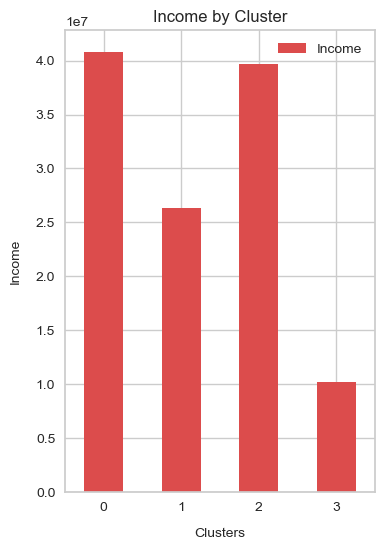

In [183]:
cluster_spendings = vb1r.groupby('Cluster_ID')[['Income']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(4,6), color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'])

plt.title('Income by Cluster')
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Income', fontsize=10, labelpad=10);
plt.xticks(rotation=0, ha='center');

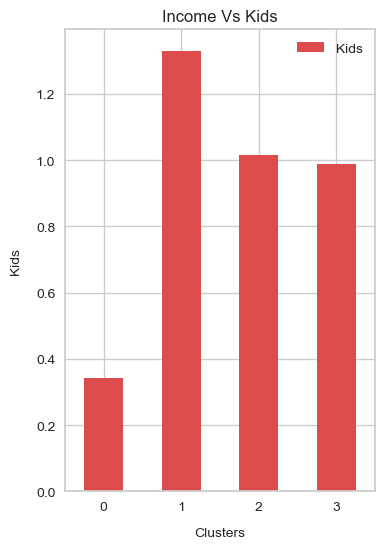

In [185]:
cluster_spendings = vb1r.groupby('Cluster_ID')[['Kids']].mean()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(4,6), color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'])

plt.title('Income Vs Kids')
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Kids', fontsize=10, labelpad=10);
plt.xticks(rotation=0, ha='center');

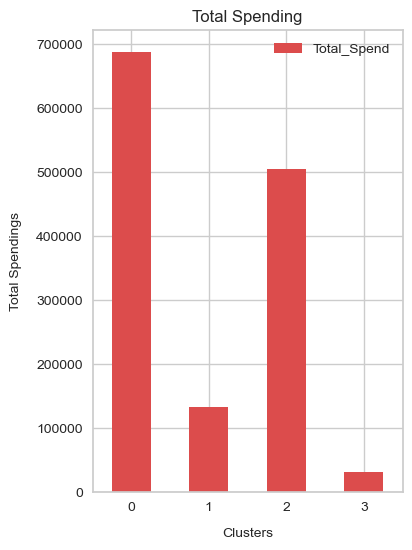

In [186]:
cluster_spendings = vb1r.groupby('Cluster_ID')[['Total_Spend']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(4,6), color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'])

plt.title('Total Spending')
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Total Spendings', fontsize=10, labelpad=10);
plt.xticks(rotation=0, ha='center');

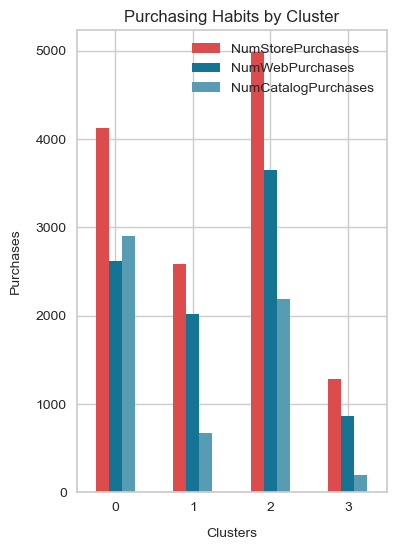

In [187]:
cluster_purchases = vb1r.groupby('Cluster_ID')[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].sum()

cluster_purchases.plot(kind='bar', color=['#dc4c4c','#157394','#589cb4','#bcb4ac','#3c444c'], figsize=(4,6))

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Purchases', fontsize=10, labelpad=10);
plt.xticks(rotation=0, ha='center');

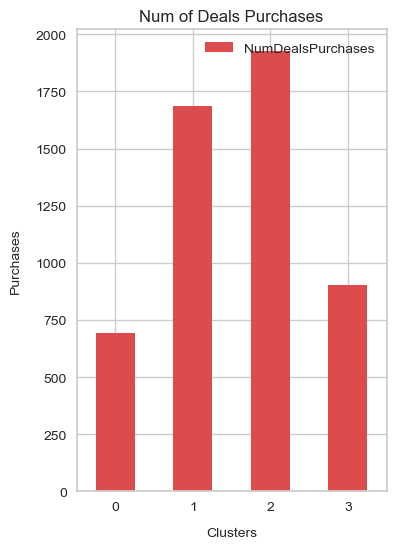

In [188]:
cluster_purchases = vb1r.groupby('Cluster_ID')[['NumDealsPurchases']].sum()

cluster_purchases.plot(kind='bar', color=['#dc4c4c','#157394','#589cb4','#bcb4ac','#3c444c'], figsize=(4,6))

plt.title('Num of Deals Purchases')
plt.xlabel('Clusters', fontsize=10, labelpad=10)
plt.ylabel('Purchases', fontsize=10, labelpad=10);
plt.xticks(rotation=0, ha='center');

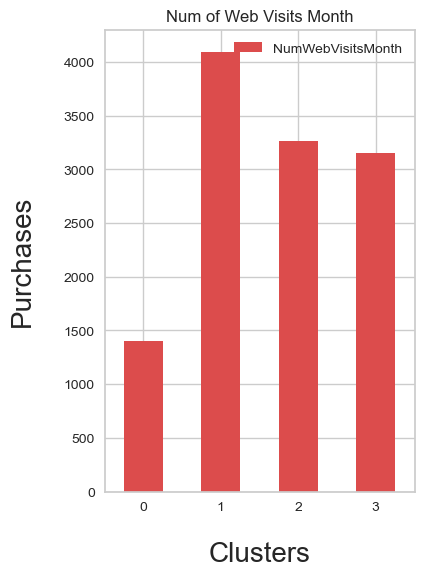

In [189]:
cluster_purchases = vb1r.groupby('Cluster_ID')[['NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', color=['#dc4c4c','#157394','#589cb4','#bcb4ac','#3c444c'], figsize=(4,6))

plt.title('Num of Web Visits Month')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

In [ ]:
'''
Cluster ID 0 : 
Highest income and Spending, lowest response to deals 
Cluster ID 2 : 
Second highest Income , Spending  and highest response to deals 
Cluster ID 1 : 
Low income , spending but second highest response to deals and shows highest web visits 
(Need to promote more deals to this group) 
Cluster ID 3 : 
Lowest income, spending but shows reasonable response to deals 

Cluster ID =  0 = Platinum  
Cluster ID =  2 = Gold 
Cluster ID =  1 = Sliver
Cluster ID =  3 = Bronze

'''

In [195]:
check = pd.read_csv('predict_check.csv')
check

,Income,Customer_Retention,Age,Kids,Total_Spend
0,58138,33,58,0,1617


In [196]:
kmeans.predict(check)

array([2])

In [197]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("Customer_Personality_Analysis_Group5_V01.pkl","wb")
pickle.dump(kmeans, pickle_out)
pickle_out.close()